# Plots of Theoretical and Practical Running Time

In [71]:
# import statements
import csv, os, re


# for plots
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time

In [82]:
# giant_string.py (modified to generate different n)

string_files = [] # stores names

for j in range(20):
    string_files.append('one_giant_string' + str(j) + '.txt')
    with open('one_giant_string' + str(j) + '.txt', 'w', encoding='utf8') as f:
        counter = 0
        for csvfile in os.listdir('c:/Users/eehie/Desktop/UBC/COSC 320/COSC320-Project/data'):
            if counter < j*100:
                with open('c:/Users/eehie/Desktop/UBC/COSC 320/COSC320-Project/data/' + csvfile, 'r', encoding='utf8') as therealcsv:
                    csvreader = csv.reader(x.replace('\0', '').replace('\r\n', '') for x in therealcsv)
                    content_col = 0
                    i = 0
                    cur_row = []
                    for row in csvreader:
                        if i == 0 and len(row) == 0:
                            break
                        elif i == 0:
                            content_col = row.index('content')
                        else:
                            f.write(re.sub(r'[\n\r\u2028\u2029]+', ' ', row[content_col] + ' '))
                        i += 1
            else:
                break
            counter += 1
        


In [90]:
# abbreviation_converter.py (modified to run through and plot different n)
print(string_files)
nValues = []
tValues = []

# Step 1: Create a dictionary of abbreviations
abbreviations = {
    "wth": "What The Hell",
    "asap": "As Soon As Possible",
    "btw": "By The Way",
    "diy": "Do It Yourself",
    "eta": "Estimated Time of Arrival",
    "fyi": "For Your Information",
    "idk": "I Don't Know",
    "imo": "In My Opinion",
    "imho": "In My Humble Opinion",
    "omw": "On My Way",
    "ttyl": "Talk To You Later",
    "wip": "Work In Progress",
    "ty": "Thank You",
    "lmao": "Laughing My A** Off",
    "lol": "Laughing Out Loud",
    "rofl": "Rolling On the Floor Laughing",
    "icymi": "In Case You Missed It",
    "tldr": "Too Long Didn't Read",
    "tmi": "Too Much Information",
    "lmk": "Let Me Know",
    "nvm": "Nevermind",
    "ftw": "For The Win",
    "np": "No Problem",
    "jk": "Just Kidding",
    "jw": "Just Wondering",
    "rn": "Right Now",
    "irl": "In Real Life",
    "dae": "Does Anyone Else",
    "gg": "Good Game",
    "smh": "Shaking My Head",
    "ngl": "Not Gonna Lie",
    "ikr": "I Know Right",
    "wtf": "What The F***",
    "aa" : "Alcoholics Anonymous",
    "a.a." : "Alcoholics Anonymous",
    "it's" : "It is",
    "doesn't" : "Does Not",
    "that's" : "That Is",
    "you're" : "You Are",
    "i'm" : "I Am"
}

# Step 2: Define a function to replace abbreviations in a line


def replace_abbreviations(line, abbrev_dict):
    pattern = re.compile(r'\b(?:' + '|'.join(re.escape(key)
                         for key in abbrev_dict.keys()) + r')\b', re.IGNORECASE)
    return pattern.sub(lambda x: abbrev_dict[x.group()], line)

def algorithm1():
    st = time.time()
    output_file = "converted_giant_string.txt"

    for i in range(len(string_files)):
        # Read the input and process it all line by line
        with open(string_files[i], 'r', encoding='utf-8') as infile:
            with open(output_file, 'w', encoding='utf-8') as outfile:
                for line in infile:
                    # Replace abbreviations in the current line
                    converted_line = replace_abbreviations(line, abbreviations)
                    # Write the converted line to the output file
                    outfile.write(converted_line)
        ft = time.time()
        running_time = ft - st
        print("Conversion completed.")
        print("Practical Running Time in Seconds: ", running_time)
        nValues.append(i*10000)
        tValues.append(running_time)

algorithm1()


['one_giant_string0.txt', 'one_giant_string1.txt', 'one_giant_string2.txt', 'one_giant_string3.txt', 'one_giant_string4.txt', 'one_giant_string5.txt', 'one_giant_string6.txt', 'one_giant_string7.txt', 'one_giant_string8.txt', 'one_giant_string9.txt', 'one_giant_string10.txt', 'one_giant_string11.txt', 'one_giant_string12.txt', 'one_giant_string13.txt', 'one_giant_string14.txt', 'one_giant_string15.txt', 'one_giant_string16.txt', 'one_giant_string17.txt', 'one_giant_string18.txt', 'one_giant_string19.txt']
Conversion completed.
Practical Running Time in Seconds:  0.0009970664978027344


KeyError: 'AA'

Text(0.5, 1.0, 'Actual Running Time')

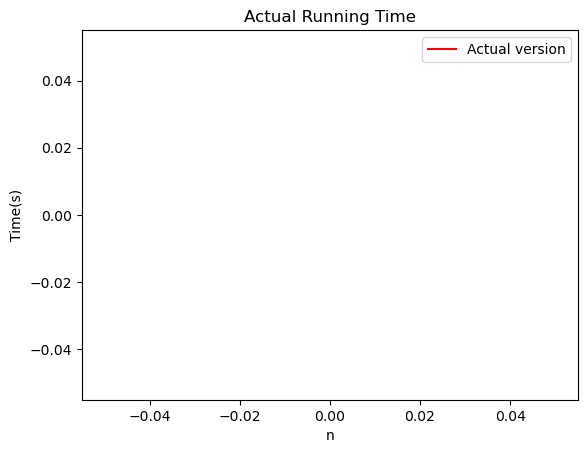

In [88]:
## practical plot
'''
theoretical_running_times = pd.DataFrame.from_dict(seconds_of_running_time)
sns.lineplot(data=theoretical_running_times, x = 'n', y = 'Running Time').set(title = "Practical Running Time of Implementation 1", ylabel = "Running Time (s)")

n = theoretical
linear_data = 
sns.lineplot(data=linear_data, x = 'n', y = 'Running Time')
'''

plt.plot(nValues, tValues, color='red', label="Actual version")

plt.xlabel("n")
plt.ylabel("Time(s)")
plt.legend()
plt.title("Actual Running Time")

C:\Users\eehie\AppData\Local\Temp\ipykernel_14348\1628836925.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(nValues, [np.log(n) for n in nValues], color='green', label="O(n^2)")


Text(0.5, 1.0, 'Theoretical Running Time')

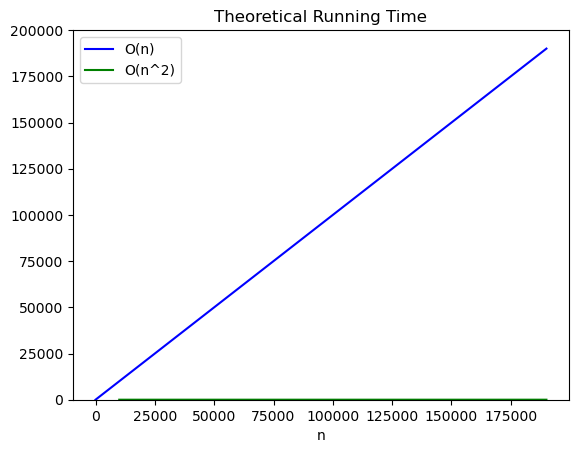

In [74]:
## theoretical plot

plt.plot(nValues, nValues, color='blue', label="O(n)")
#plt.plot(nValues, [np.log(n) for n in nValues], color='green', label="O(n^2)")
plt.xlabel("n")
plt.ylim(0, 200000)
plt.legend()
plt.title("Theoretical Running Time")

In [92]:


def test1():
    string = "Yay, lol I love this song i'm"
    print(replace_abbreviations(string, abbreviations))

test1()

Yay, Laughing Out Loud I love this song I Am
